<a href="https://colab.research.google.com/github/manishkhanal1989/Project/blob/main/Auto_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MACHINE LEARNING AUTO PRICE PREDICTION REGRESSION PROJECT***

**INFO**

By: Manish Khanal

**Data Information:**

**Sources:**

The dataset is obtained from UCI Machine Learning Repository

https://archive.ics.uci.edu/dataset/10/automobile


**Dataset Overview:**

Dataset Name: Automobile
Source: UCI Machine Learning Repository
Characteristics: Multivariate
Associated Tasks: Regression
Feature Type: Categorical, Integer, Real
Instances: 205
Features: 25

**Target**

Price:

The goal is to predic the price based on different other attributes.


In [161]:
#Importing necessary libraries and loading the dataset into pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header=None, na_values='?')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


***DATA PREPROCESSING***

In [162]:
#Since there are no headers on the dataset, we will assign headers to each columns
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers

In [163]:
#Now let's check the first five rows of the dataset again to view it with the headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [164]:
#View data types of each features
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [165]:
#We will no check if the dataset has any missing values
missing_value=df.isna().sum()
missing_value

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Due to the presence of missing values in certain features, my approach involves imputing the missing values for numeric features with their respective means. Additionally, I opt to exclude instances with missing values in the target variable, "price," and the categorical variable "number of doors."

In [166]:
# Calculating the mean of the features that have numeric values
normalized_losses_mean=df['normalized-losses'].mean()
bore_mean=df['bore'].mean()
stroke_mean=df['stroke'].mean()
horsepower_mean=df['horsepower'].mean()
peak_rpm_mean=df['peak-rpm'].mean()

In [167]:
#Replacing the rows that have missing values with mean of it's features
df['normalized-losses'].replace(np.nan, normalized_losses_mean, inplace=True)
df['bore'].replace(np.nan, bore_mean, inplace=True)
df['stroke'].replace(np.nan, stroke_mean, inplace=True)
df['horsepower'].replace(np.nan, horsepower_mean, inplace=True)
df['peak-rpm'].replace(np.nan, peak_rpm_mean, inplace=True)

In [168]:
#Dropping the other missing values from other columns
df.dropna(subset=['price', 'num-of-doors'], inplace=True)

In [169]:
#Changing the object data type to float data type for features that should be numeric
df[["bore", "stroke", 'price', 'peak-rpm', 'normalized-losses']] = df[["bore", "stroke", 'price', 'peak-rpm', 'normalized-losses']].astype("float")

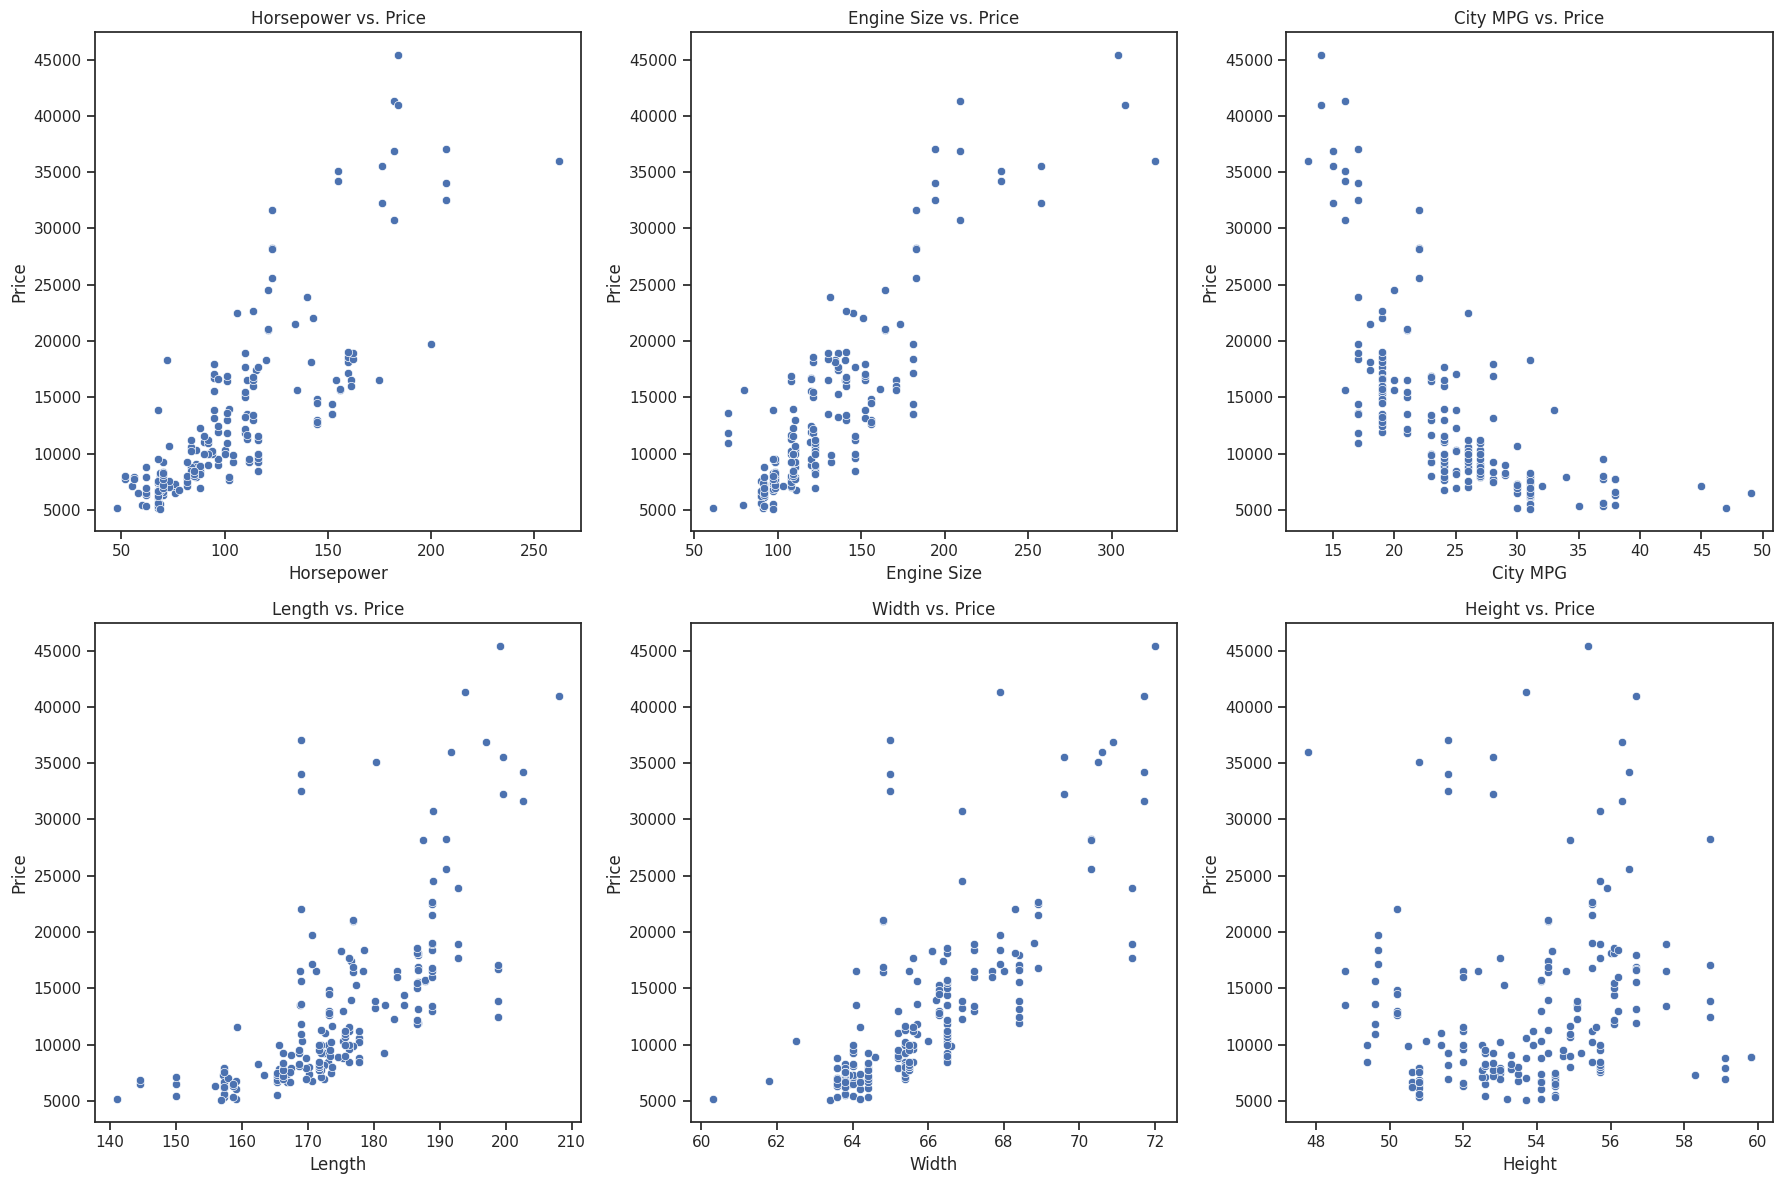

In [170]:
# Visualizing the target feature "Price" with some other features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Scatter Plot 1: Horsepower vs. Price
sns.scatterplot(x='horsepower', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Horsepower vs. Price')
axes[0, 0].set_xlabel('Horsepower')
axes[0, 0].set_ylabel('Price')

# Scatter Plot 2: Engine Size vs. Price
sns.scatterplot(x='engine-size', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Engine Size vs. Price')
axes[0, 1].set_xlabel('Engine Size')
axes[0, 1].set_ylabel('Price')

# Scatter Plot 3: City MPG vs. Price
sns.scatterplot(x='city-mpg', y='price', data=df, ax=axes[0, 2])
axes[0, 2].set_title('City MPG vs. Price')
axes[0, 2].set_xlabel('City MPG')
axes[0, 2].set_ylabel('Price')

# Scatter Plot 4: Length vs. Price
sns.scatterplot(x='length', y='price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Length vs. Price')
axes[1, 0].set_xlabel('Length')
axes[1, 0].set_ylabel('Price')

# Scatter Plot 5: Width vs. Price
sns.scatterplot(x='width', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Width vs. Price')
axes[1, 1].set_xlabel('Width')
axes[1, 1].set_ylabel('Price')

# Scatter Plot 6: Height vs. Price
sns.scatterplot(x='height', y='price', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Height vs. Price')
axes[1, 2].set_xlabel('Height')
axes[1, 2].set_ylabel('Price')

plt.tight_layout()
plt.show()

Based on the scatter plots presented above, it is evident that there is a strong correlation between Price and variables such as Horsepower, Engine Size, and City MPG. Length exhibits a moderate level of correlation, while Height shows no significant correlation with the price.

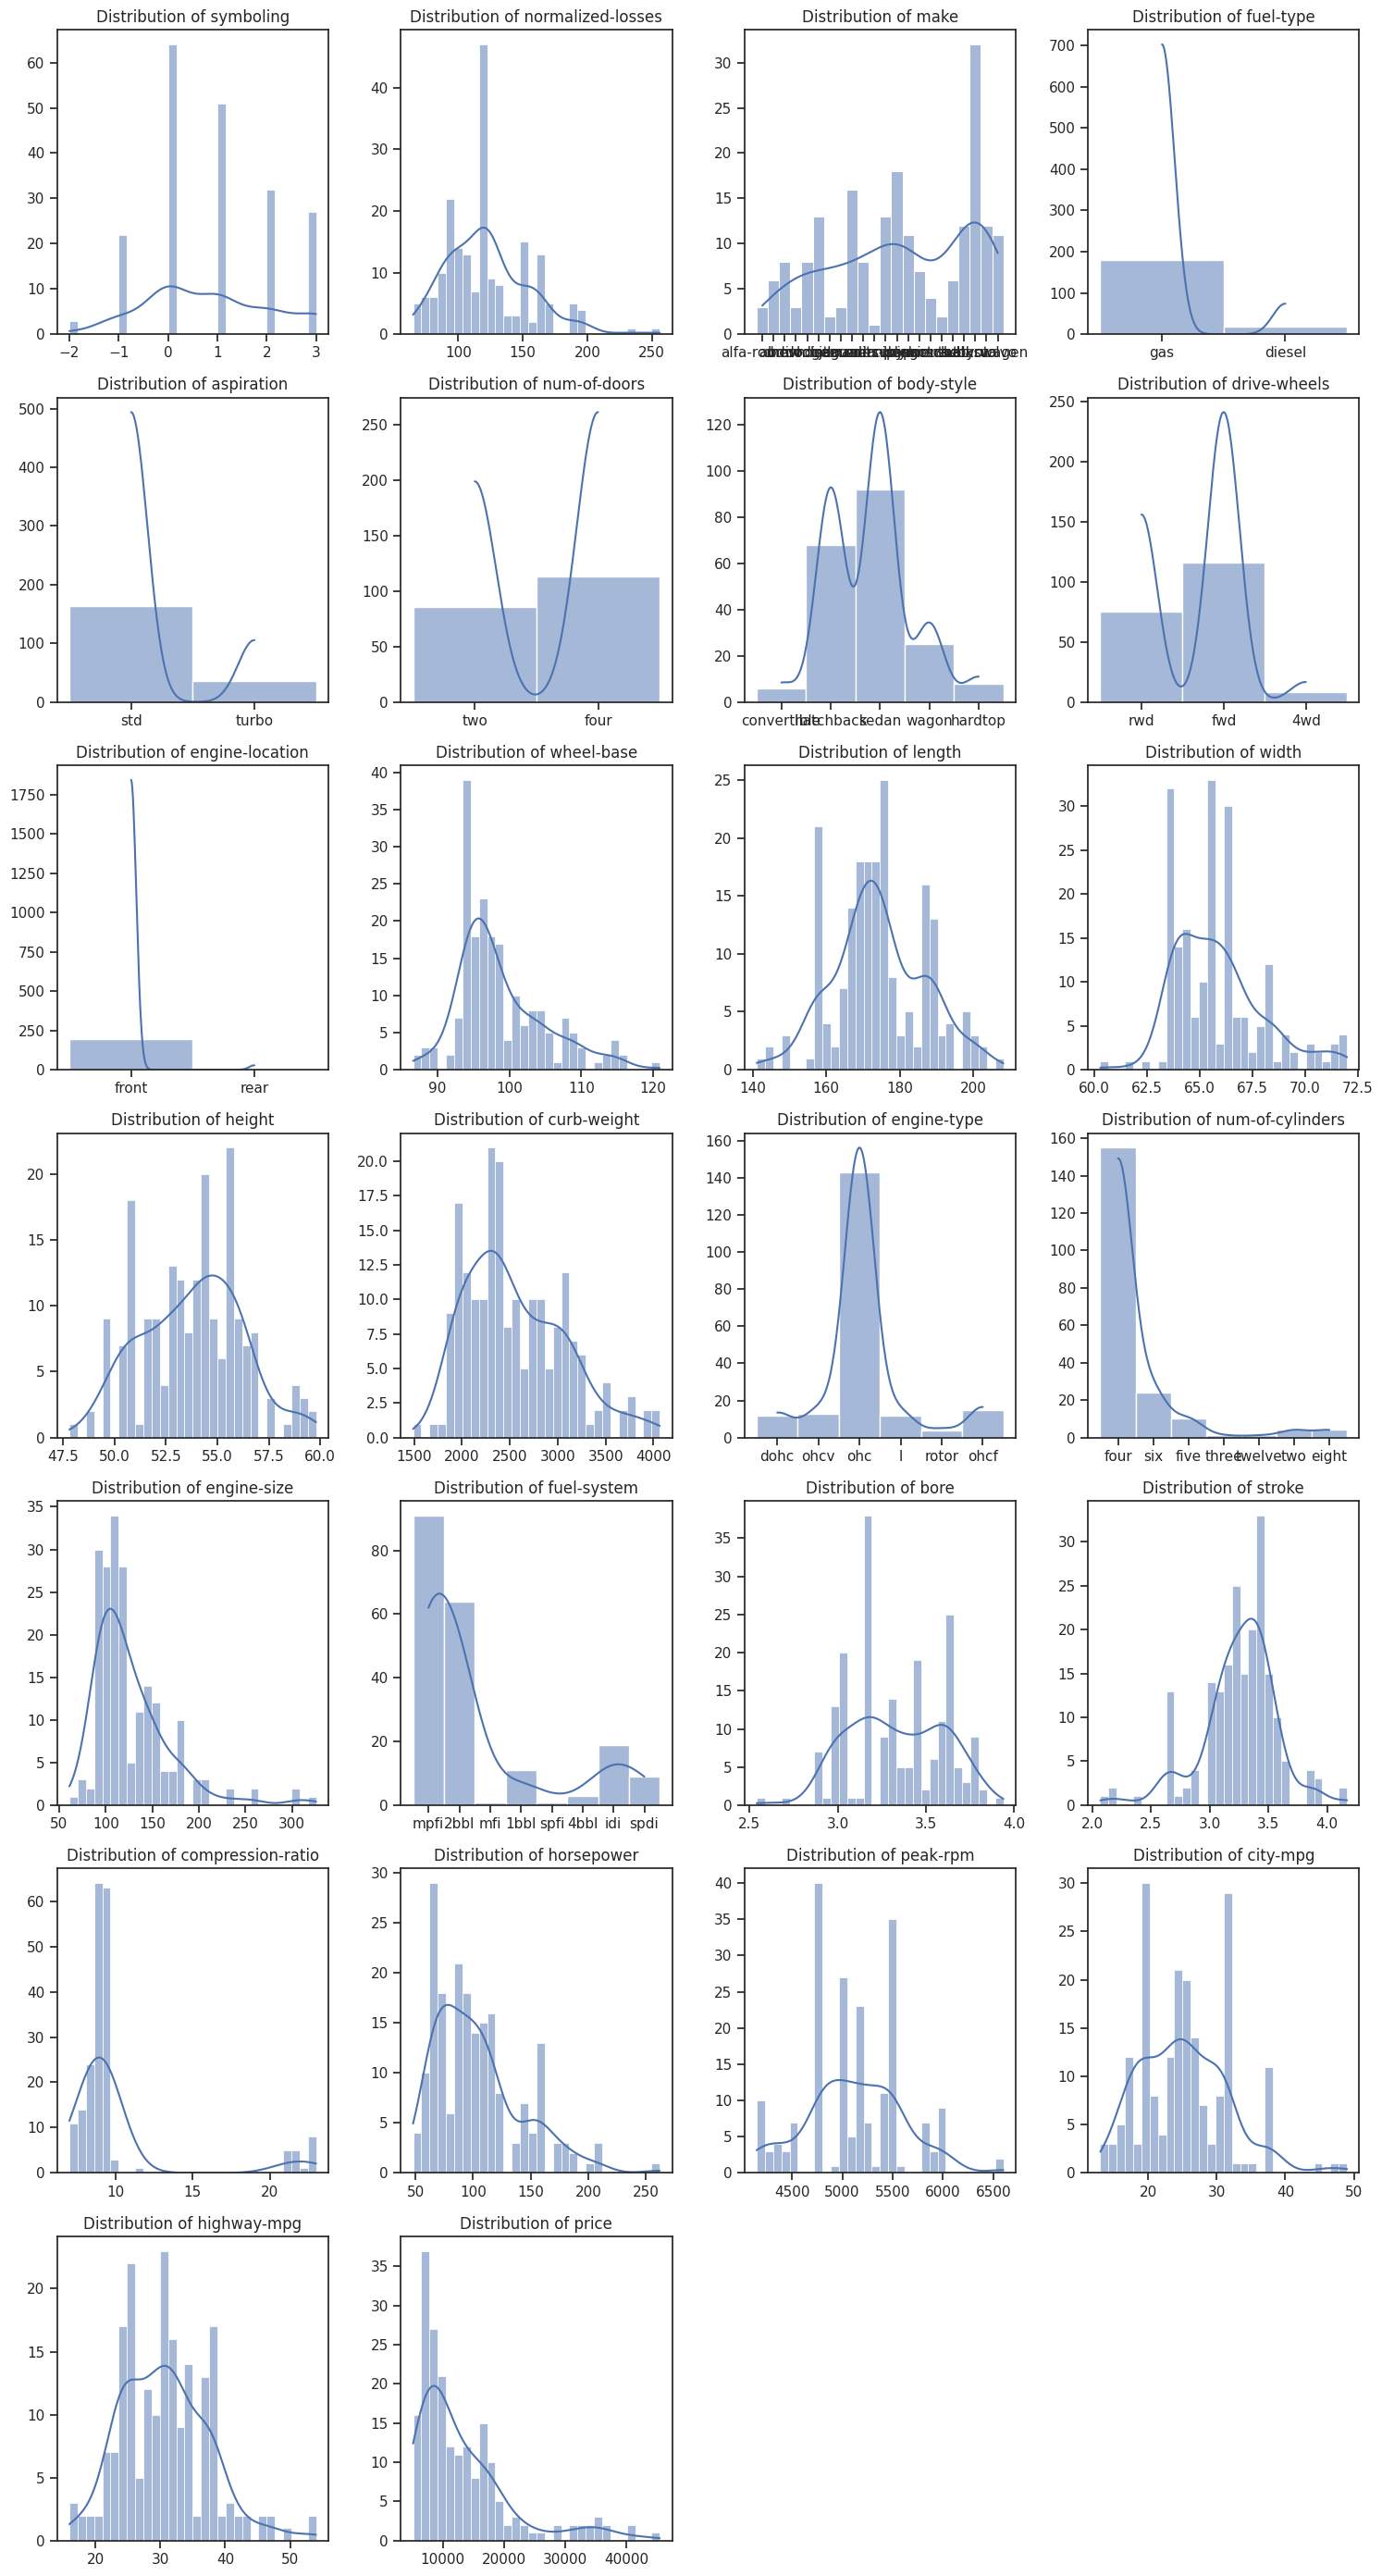

In [171]:
#Checking distributions of the columns
# Set up the figure and axes
num_features = len(headers)
num_rows = (num_features - 1) // 4 + 1  # Adjust the number of rows based on the number of features
num_cols = min(num_features, 4)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each column in headers and create a distribution plot
for i, column in enumerate(headers):
    sns.histplot(df[column], kde=True, ax=axes[i], bins=30)  # Adjust 'bins' as needed
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(None)  # Remove x-axis label for better readability
    axes[i].set_ylabel(None)  # Remove y-axis label for better readability

# Remove empty subplots if any
for j in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [172]:
# Normalizing the numeric features
from sklearn.preprocessing import MinMaxScaler

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize all numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
#View the first 5 rows of the dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,...,0.260377,mpfi,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,1.0,0.298429,alfa-romero,gas,std,two,convertible,rwd,front,0.058309,...,0.260377,mpfi,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.6,0.298429,alfa-romero,gas,std,two,hatchback,rwd,front,0.230321,...,0.343396,mpfi,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.8,0.518325,audi,gas,std,four,sedan,fwd,front,0.384840,...,0.181132,mpfi,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.8,0.518325,audi,gas,std,four,sedan,4wd,front,0.373178,...,0.283019,mpfi,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


<ipython-input-173-bfa28d40ff2c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


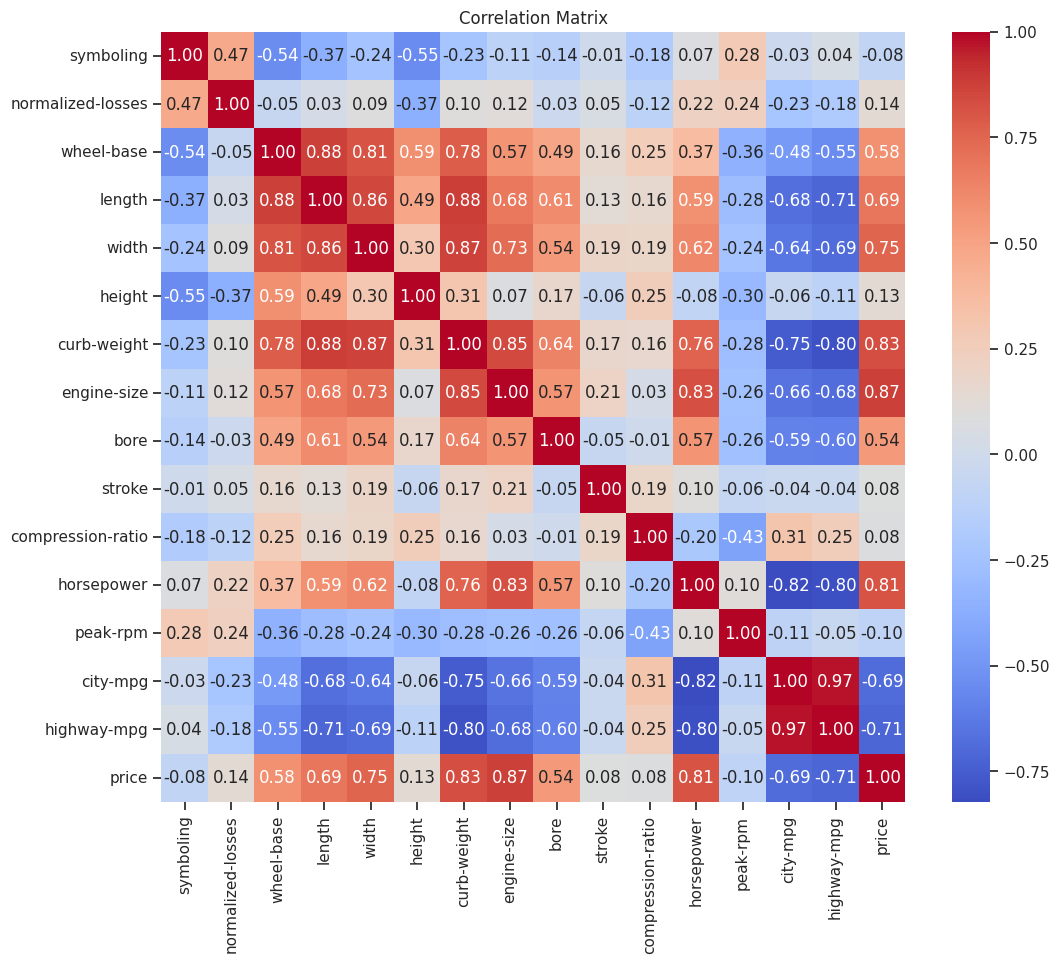

In [173]:
#Checking correlation
correlation_matrix=df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [174]:
#Now checking the p value on the features that have correlation more than 0.8 and more than -0.8

# Features with high correlation (greater than 0.7 or less than -0.7) against 'price'
high_corr_features = correlation_matrix[(correlation_matrix['price'] > 0.7) | (correlation_matrix['price'] < -0.7)].index

# List to store results
correlation_results = []

# Perform hypothesis testing for each feature against 'price'
for feature in high_corr_features:
    corr, p_value = pearsonr(df[feature], df['price'])
    correlation_results.append({'Feature': feature, 'Correlation': corr, 'P-Value': p_value})

# Display the results
result_df = pd.DataFrame(correlation_results)
print(result_df)

       Feature  Correlation       P-Value
0        width     0.751628  1.875455e-37
1  curb-weight     0.834059  8.781207e-53
2  engine-size     0.872152  4.443949e-63
3   horsepower     0.811000  9.562245e-48
4  highway-mpg    -0.708139  1.334268e-31
5        price     1.000000  0.000000e+00


In [175]:
# Perform one hot encoding on the categorical features
df_categorical = df.select_dtypes(include=['object'])

df = pd.get_dummies(df, columns=df_categorical.columns)

In [176]:
df.head()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,...,0,0,0,0,0,0,0,1,0,0
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,...,0,0,0,0,0,0,0,1,0,0
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,...,0,0,0,0,0,0,0,1,0,0


In [177]:
#Splitting the dataset into traning and testing sets.

X = df.drop('price', axis=1)
y = df['price']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
#MODELS

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# XGBoost
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)

# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Neural Network (using TensorFlow and Keras)
# Note: You may need to adjust the architecture and parameters based on your specific requirements.
nn_model = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500))
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)


Linear Regression - MAE: 0.0541, MSE: 0.0076, RMSE: 0.0870
XGBoost - MAE: 0.0576, MSE: 0.0085, RMSE: 0.0922
Random Forest - MAE: 0.0590, MSE: 0.0085, RMSE: 0.0920
Neural Network - MAE: 0.2701, MSE: 0.1559, RMSE: 0.3949


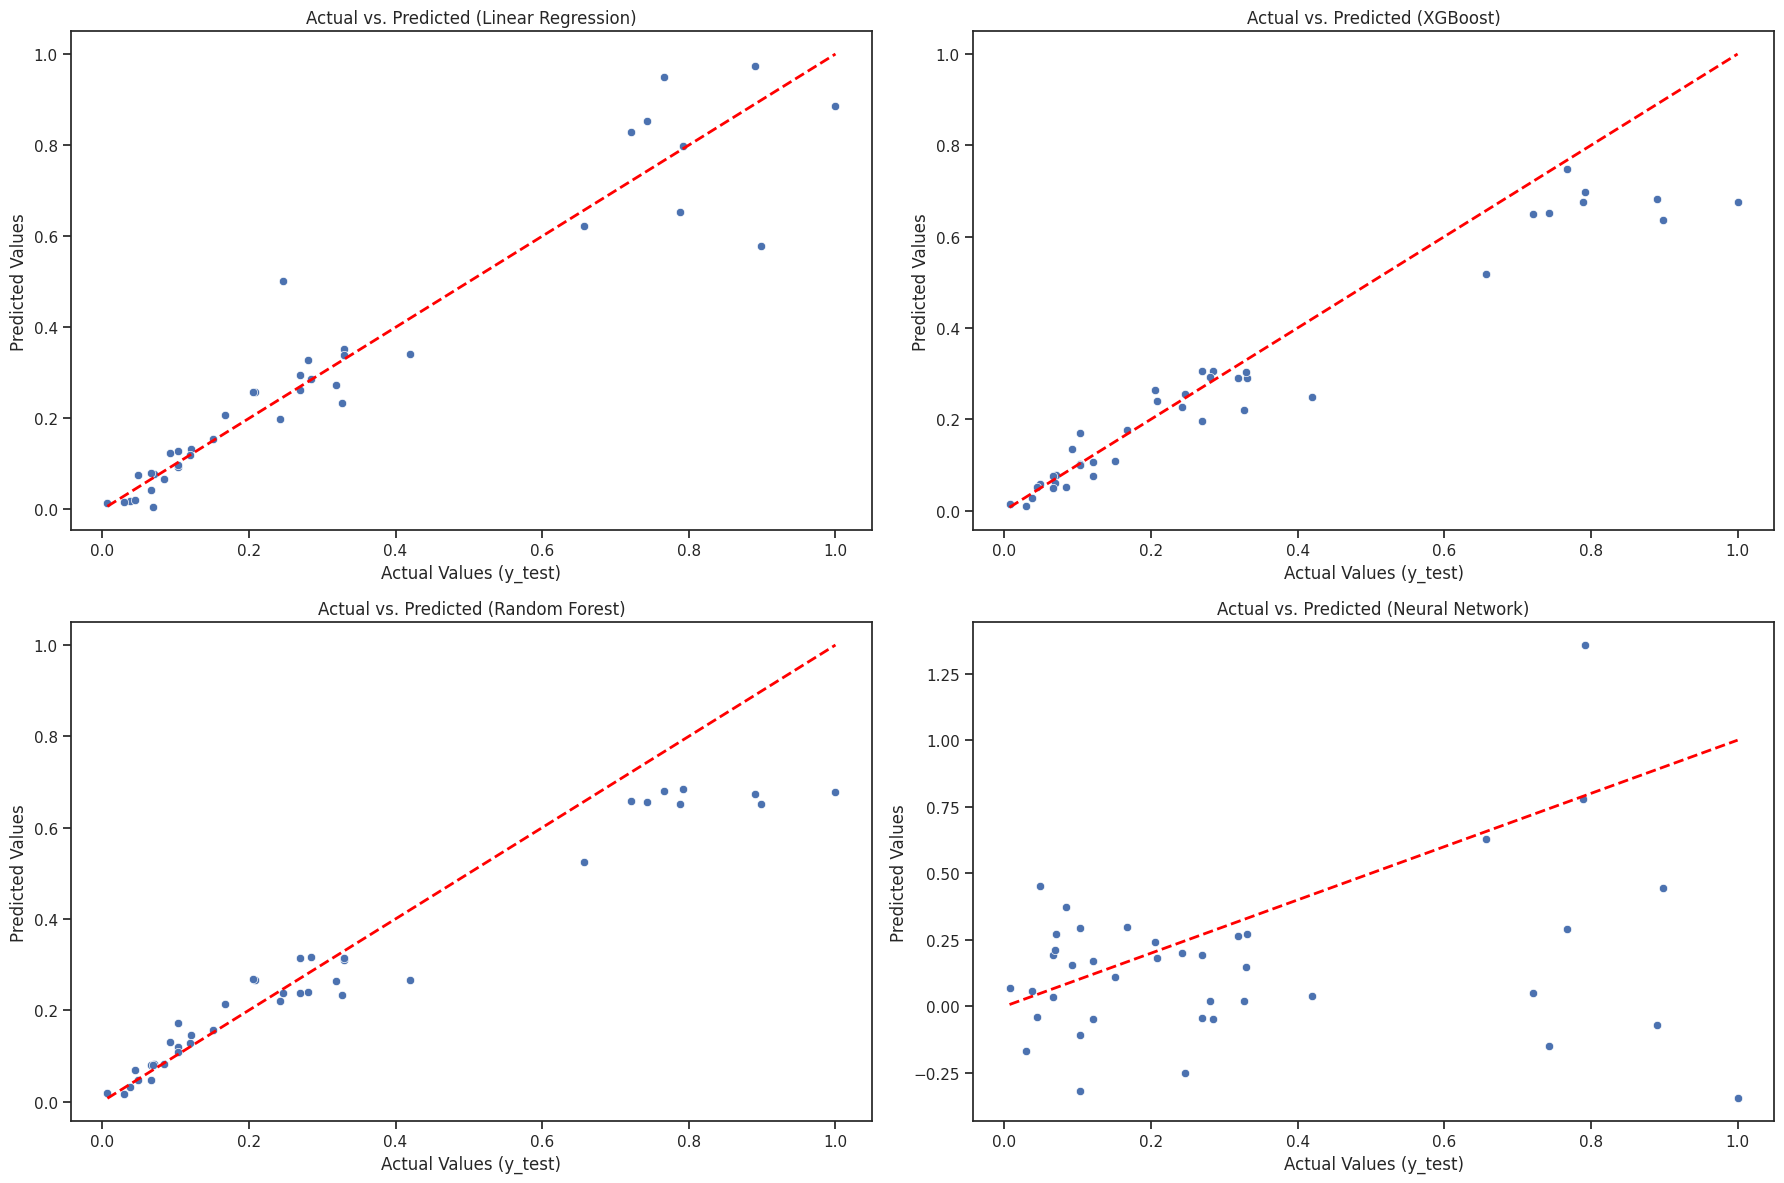

In [180]:
#MODEL EVALUATION

# Evaluate models
models = [linear_model, xgboost_model, random_forest_model, nn_model]
model_names = ['Linear Regression', 'XGBoost', 'Random Forest', 'Neural Network']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}")

# Visualize predictions
plt.figure(figsize=(18, 12))

for i, (model, name) in enumerate(zip(models, model_names), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=model.predict(X_test))
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    plt.title(f'Actual vs. Predicted ({name})')
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

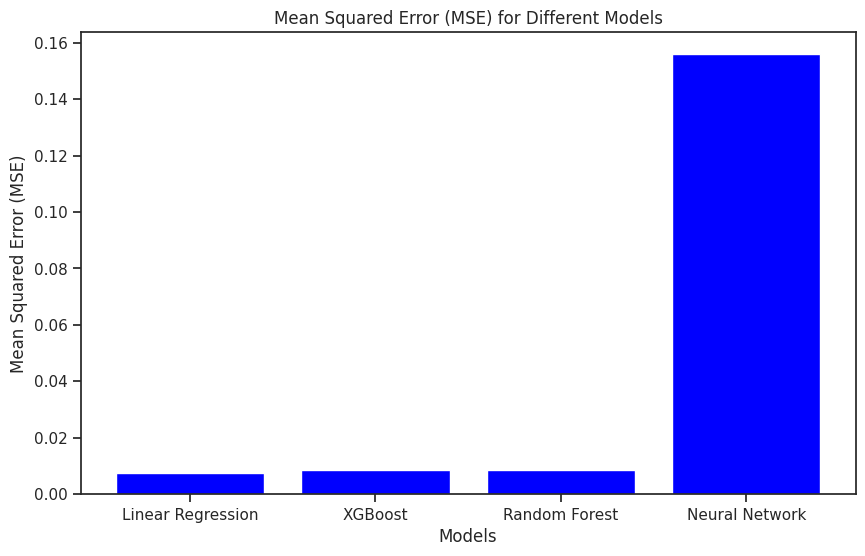

In [182]:
#Visualizing MSE for Different Models
model_names = ['Linear Regression', 'XGBoost', 'Random Forest', 'Neural Network']
mae_values = []

for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae_values.append(mse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values, color='blue')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()

**Interpretation**

Linear Regression: This model has the lowest MAE, MSE, and RMSE among all the models. It indicates that, on average, the predictions are close to the actual values with relatively small errors.

XGBoost and Random Forest: Both of these ensemble models also perform well, with similar MAE, MSE, and RMSE values. The choice between XGBoost and Random Forest might depend on specific considerations such as interpretability, training time, or the need for feature importance information.

Neural Network: The neural network has a higher MAE, MSE, and RMSE compared to the other models. It suggests that, on average, the predictions have larger errors. This could be due to the complexity of the model, overfitting, or the need for tuning.

In summary, lower values for MAE, MSE, and RMSE indicate better model performance. The choice of the "best" model depends on your specific requirements, the nature of your data, and considerations related to each model's strengths and weaknesses. The linear regression model, in this case, seems to provide the best balance of accuracy and simplicity.